<a href="https://colab.research.google.com/github/eolmez91/MushroomsDataset/blob/master/dead_or_alive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# İlk olarak veri kümesinin bulunduğu drive hesabını colab'e bağlıyoruz.
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# Kullanağım kütüphaneleri çağırıyoruz.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [0]:
# Veri kümesinin bulunduğu klasöre gidiyoruz
%cd "/content/drive/My Drive/BOOTCAMP/Mushroom Classification"

/content/drive/My Drive/BOOTCAMP/Mushroom Classification


In [0]:
# Klasördeki dosyaları kontrol ediyoruz
!ls

'dead or alive.ipynb'   mushrooms.csv


In [0]:
# Veri kümesini, mdata isimli bir veri çerçevesine atıyoruz
mdata = pd.read_csv('mushrooms.csv')

In [0]:
# Verimizi kontrol edelim
mdata.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [0]:
mdata.shape 

(8124, 23)

In [0]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

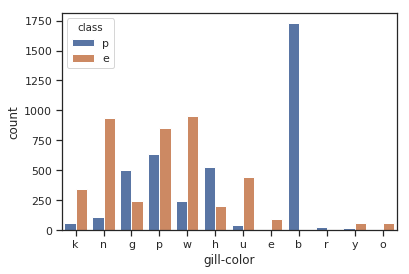

In [0]:
# Veri kümemeizde yer alan renk ve koku sınıflandırmalarını grafik üzerinden değerlendirelim.
sns.countplot(x='gill-color', hue='class', data=mdata)
plt.show()

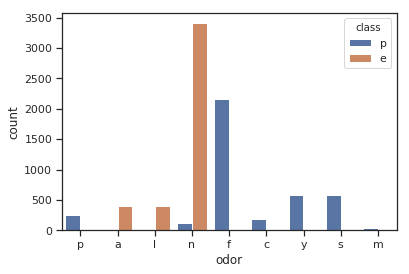

In [0]:
sns.countplot(x='odor', hue='class', data=mdata)
plt.show()

In [0]:
# Veri setimizdeki tüm değerler string formatında olduğu için hepsini encode ederek integer değerlere çevirmemiz gerekmektedir
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in mdata.columns:
  mdata[i] = le.fit_transform(mdata[i])

In [0]:
mdata.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [0]:
# Şimdi datamızı ayıralım özelliklere ve etiketlere ayıralım

X = mdata.iloc[:, 1:23]
y = mdata['class']

In [0]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [0]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [0]:
# Şimdi test ve train datalarımızı oluşturuyoruz

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 5)

In [0]:
# İlk olarak Decision Tree algoritmasını deneyelim.

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
acc_test = dt.score(X_test, y_test)
print("Test Verilerinde Başarı: ", acc_test)

Test Verilerinde Başarı:  1.0


In [0]:
acc_train = dt.score(X_train, y_train)
print("Eğitim Verilerinde Başarı: ", acc_train)

Eğitim Verilerinde Başarı:  1.0


In [0]:
# Şimdide Random Forest üzerinde deneyelim
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
acc_test1 = rfc.score(X_test, y_test)

print ("Test Verilerinde Başarı:", acc_test1)

Test Verilerinde Başarı: 1.0


In [0]:
acc_train1 = rfc.score(X_train, y_train)

print ("Test Verilerinde Başarı:", acc_train1)

Test Verilerinde Başarı: 1.0


In [0]:
# Son olarak Logistic Regression algoritmasını deneyelim
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
acc_test2 = rfc.score(X_test, y_test)

print ("Test Verilerinde Başarı:", acc_test2)

Test Verilerinde Başarı: 1.0


In [0]:
acc_train2 = rfc.score(X_train, y_train)

print ("Test Verilerinde Başarı:", acc_train2)

Test Verilerinde Başarı: 1.0
